## 对于某地房地产销售情况的分析

### 1、提出问题：
$ \quad \bullet $ 整体房价的销售形势  
$ \quad \bullet $ 哪个区域的房价最高  
$ \quad \bullet $ 哪种户型（几室）的房子最好卖  
$ \quad \bullet $ 居民购房以高层（18以上）为主还是以中低层为主？

### 2、导入数据集，清洗并对数据进行去重、缺失值补充、统计分析

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100

In [32]:
df = pd.read_csv(r"D:/sql/数据集/archive/new.csv",encoding="gbk",engine="python")
df = df[["url","Lng","Lat","tradeTime","totalPrice","price","square","livingRoom","floor","constructionTime","district","communityAverage"]]
df.columns = ["网址","纬度","经度","交易时间","总价","单价","面积","卧室","楼层","建造时间","区","社区均价"]
df.head()

,网址,纬度,经度,交易时间,总价,单价,面积,卧室,楼层,建造时间,区,社区均价
0,https://bj.lianjia.com/chengjiao/101084782030....,116.475489,40.019520,2016-08-09,415.0,31680,131.00,2,高 26,2005,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,116.453917,39.881534,2016-07-28,575.0,43436,132.38,2,高 22,2004,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,116.561978,39.877145,2016-12-11,1030.0,52021,198.00,3,中 4,2005,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,116.438010,40.076114,2016-09-30,297.5,22202,134.00,3,底 21,2008,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,116.428392,39.886229,2016-08-28,392.0,48396,81.00,2,中 6,1960,1,62588.0


对其中的楼层字段进行处理

In [33]:
df["所在楼层"] = df["楼层"].str.extract('(.\d+)')
df.head()

,网址,纬度,经度,交易时间,总价,单价,面积,卧室,楼层,建造时间,区,社区均价,所在楼层
0,https://bj.lianjia.com/chengjiao/101084782030....,116.475489,40.019520,2016-08-09,415.0,31680,131.00,2,高 26,2005,7,56021.0,26
1,https://bj.lianjia.com/chengjiao/101086012217....,116.453917,39.881534,2016-07-28,575.0,43436,132.38,2,高 22,2004,7,71539.0,22
2,https://bj.lianjia.com/chengjiao/101086041636....,116.561978,39.877145,2016-12-11,1030.0,52021,198.00,3,中 4,2005,7,48160.0,4
3,https://bj.lianjia.com/chengjiao/101086406841....,116.438010,40.076114,2016-09-30,297.5,22202,134.00,3,底 21,2008,6,51238.0,21
4,https://bj.lianjia.com/chengjiao/101086920653....,116.428392,39.886229,2016-08-28,392.0,48396,81.00,2,中 6,1960,1,62588.0,6


$ \quad \bullet $ 查看是否有缺失值 

In [34]:
df.isna().sum()

网址        0
纬度        0
经度        0
交易时间      0
总价        0
单价        0
面积        0
卧室        0
楼层        0
建造时间      0
区         0
社区均价    463
所在楼层     32
dtype: int64

In [35]:
df.社区均价 = df.社区均价.fillna(df.社区均价.mean())
# 使用社区均价对其中的缺失值进行补充

In [36]:
df.所在楼层 = df.所在楼层[~df.所在楼层.isna()].astype("int")

In [37]:
df.所在楼层 = df.所在楼层.fillna(int(df.所在楼层.mean()))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318851 entries, 0 to 318850
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   网址      318851 non-null  object 
 1   纬度      318851 non-null  float64
 2   经度      318851 non-null  float64
 3   交易时间    318851 non-null  object 
 4   总价      318851 non-null  float64
 5   单价      318851 non-null  int64  
 6   面积      318851 non-null  float64
 7   卧室      318851 non-null  object 
 8   楼层      318851 non-null  object 
 9   建造时间    318851 non-null  object 
 10  区       318851 non-null  int64  
 11  社区均价    318851 non-null  float64
 12  所在楼层    318851 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 31.6+ MB


$ \quad \bullet $ 查看是否存在重复值

In [39]:
df[df.duplicated(subset="网址")==True]
# 不存在重复值

,网址,纬度,经度,交易时间,总价,单价,面积,卧室,楼层,建造时间,区,社区均价,所在楼层


### 数据的描述性统计分析

In [40]:
df.describe()

,纬度,经度,总价,单价,面积,区,社区均价,所在楼层
count,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000,318851.000000
mean,116.418459,39.949591,349.030201,43530.436379,83.240597,6.763564,63682.446305,13.299880
std,0.112054,0.091983,230.780778,21709.024204,37.234661,2.812616,22312.997504,7.826297
min,116.072514,39.627030,0.100000,1.000000,6.900000,1.000000,10847.000000,1.000000
25%,116.344985,39.893200,205.000000,28050.000000,57.900000,6.000000,46339.000000,6.000000
50%,116.416780,39.934527,294.000000,38737.000000,74.260000,7.000000,59021.000000,11.000000
75%,116.477581,40.003018,425.500000,53819.500000,98.710000,8.000000,75942.000000,19.000000
max,116.732378,40.252758,18130.000000,156250.000000,1745.500000,13.000000,183109.000000,63.000000


In [41]:
df.describe(include="object")

,网址,交易时间,卧室,楼层,建造时间
count,318851,318851,318851,318851,318851
unique,318851,2560,11,203,74
top,https://bj.lianjia.com/chengjiao/101084782030....,2016-02-28,2,中 6,2004
freq,1,1096,160589,34788,21145


### 3、解决问题

#### 1)、整体房价的销售趋势

In [42]:
data_time = df[["交易时间","单价"]]
data_time.head()

,交易时间,单价
0,2016-08-09,31680
1,2016-07-28,43436
2,2016-12-11,52021
3,2016-09-30,22202
4,2016-08-28,48396


In [43]:
data_time["交易时间"] = pd.to_datetime(data_time.交易时间)

C:\Users\12562\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
data_sal = data_time.set_index("交易时间")
data_sal.head()

,单价
交易时间,
2016-08-09,31680
2016-07-28,43436
2016-12-11,52021
2016-09-30,22202
2016-08-28,48396


In [45]:
data_y = data_sal.resample("Y").mean()
data_y

,单价
交易时间,
2002-12-31,19434.666667
2003-12-31,26923.000000
2004-12-31,NaN
2005-12-31,NaN
2006-12-31,NaN
2007-12-31,NaN
2008-12-31,22195.000000
2009-12-31,26964.000000
2010-12-31,15574.767196


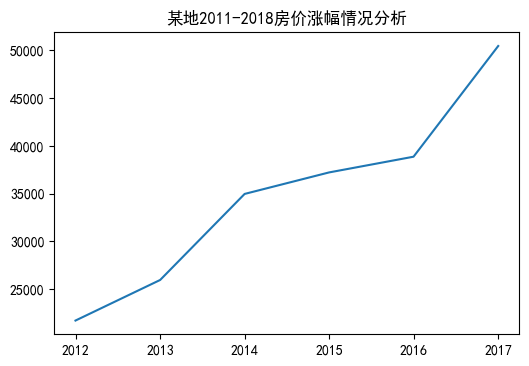

In [46]:
# 2002-2007的数据较少，可以忽略不计
plt.plot(data_y[9:-2])
plt.title("某地2011-2018房价涨幅情况分析")
plt.show()

### 从图中可以看出，2011至2016年间，房屋交易价格在逐年增加趋势，其中2013-2014、2016-2017均涨幅较大。

#### 2)、哪个区域的房价最高

In [47]:
data_area = df[["区","单价"]].groupby("区",as_index=False).mean()
data_area.head()

,区,单价
0,1,62024.151235
1,2,38173.677994
2,3,31312.978715
3,4,30022.898126
4,5,28329.428088


In [48]:
data_area.sort_values(by="单价",ascending=True,inplace=True)
data_area

,区,单价
12,13,24244.414149
11,12,26328.043427
10,11,27472.247173
4,5,28329.428088
5,6,29380.379277
3,4,30022.898126
2,3,31312.978715
8,9,35171.638642
1,2,38173.677994
6,7,43628.537438


In [49]:
data_area.区 = data_area.区.astype("str")

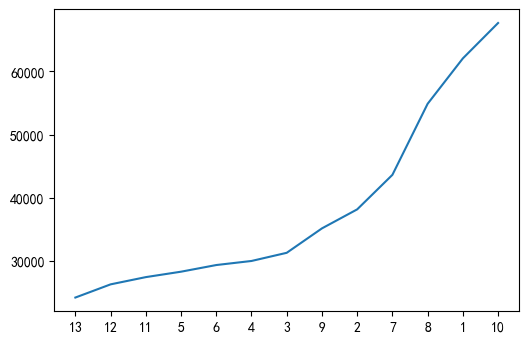

In [50]:
plt.plot(data_area.区,data_area.单价)
plt.show()

### 从上图可以看出，越往1区房价越高，并且最高价高出最低价的三倍

#### 3)、哪种户型（几室）的房子最好卖

In [51]:
# 统计出各个卧室个数的房型的总数
data_room = df[["卧室"]]
data_room.head()

,卧室
0,2
1,2
2,3
3,3
4,2


In [52]:
data_room.value_counts()

卧室    
2         160589
1          82386
3          67611
4           6821
5           1107
6            228
7             37
#NAME?        32
0             28
8              7
9              5
dtype: int64

In [53]:
160589/data_room.size

0.5036490398336527

### 从上图可以看出，两室的房型最多，并且占了所有房型总数的50%以上

#### 4) 、居民购房以高层（18以上）为主还是以中低层为主？

#### 将df分为高层与非高层

In [54]:
df["是否是高层"] = np.where(df["所在楼层"]<=18,"非高层","高层")
df.head()

,网址,纬度,经度,交易时间,总价,单价,面积,卧室,楼层,建造时间,区,社区均价,所在楼层,是否是高层
0,https://bj.lianjia.com/chengjiao/101084782030....,116.475489,40.019520,2016-08-09,415.0,31680,131.00,2,高 26,2005,7,56021.0,26.0,高层
1,https://bj.lianjia.com/chengjiao/101086012217....,116.453917,39.881534,2016-07-28,575.0,43436,132.38,2,高 22,2004,7,71539.0,22.0,高层
2,https://bj.lianjia.com/chengjiao/101086041636....,116.561978,39.877145,2016-12-11,1030.0,52021,198.00,3,中 4,2005,7,48160.0,4.0,非高层
3,https://bj.lianjia.com/chengjiao/101086406841....,116.438010,40.076114,2016-09-30,297.5,22202,134.00,3,底 21,2008,6,51238.0,21.0,高层
4,https://bj.lianjia.com/chengjiao/101086920653....,116.428392,39.886229,2016-08-28,392.0,48396,81.00,2,中 6,1960,1,62588.0,6.0,非高层


In [56]:
data_floor = df[["网址","区","是否是高层"]]
data_floor.head()

,网址,区,是否是高层
0,https://bj.lianjia.com/chengjiao/101084782030....,7,高层
1,https://bj.lianjia.com/chengjiao/101086012217....,7,高层
2,https://bj.lianjia.com/chengjiao/101086041636....,7,非高层
3,https://bj.lianjia.com/chengjiao/101086406841....,6,高层
4,https://bj.lianjia.com/chengjiao/101086920653....,1,非高层


In [57]:
data_floor_fin = data_floor.groupby(["区","是否是高层"],as_index=False)["网址"].count()
data_floor_fin.columns = ["区","是否是高层","数量"]
data_floor_fin

,区,是否是高层,数量
0,1,非高层,14578
1,1,高层,2508
2,2,非高层,17563
3,2,高层,11775
4,3,非高层,1641
5,3,高层,896
6,4,非高层,13583
7,4,高层,1730
8,5,非高层,2495
9,5,高层,460


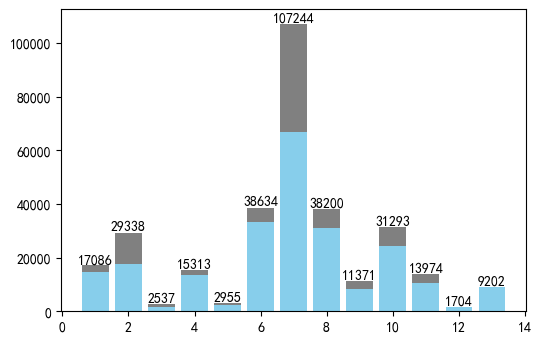

In [58]:
# 非高层的数据
data_floor_f = data_floor_fin[data_floor_fin["是否是高层"]=="非高层"]
ba1 = plt.bar(data_floor_f["区"],data_floor_f["数量"],color="skyblue")

# 高层的数据
data_floor_g = data_floor_fin[data_floor_fin["是否是高层"]=="高层"]
bar2 = plt.bar(data_floor_g["区"],data_floor_g["数量"],color="gray",bottom=data_floor_f["数量"])
plt.bar_label(bar2)
plt.show()

### 从上图可以看出，各个区大部分非高层房型的交易数量都远高于高层

In [59]:
data_diff = data_floor_fin.groupby("是否是高层",as_index=False)["数量"].sum()
data_diff["占比"] = data_diff.数量/data_diff.数量.sum()
data_diff

,是否是高层,数量,占比
0,非高层,234484,0.735403
1,高层,84367,0.264597


### 从总体的占比看，非高层的房型交易数量占比达到了73%以上

## 总言

   本次通过简单的分析了解北京地区的二手房价格及销售情况，其中整体房价以上涨趋势为主，同时各地区房价差异明显，最高价甚至超出了最低价的三倍以上，说明地段对房价的影响十分明显。  
  交易的房型以小型的房型为主，说明刚需依旧是市场的主旋律，另外，高层住宅（18楼以上）的占比较小。